In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
#pip install pyarrow
#pip install fastparquet
#Extension para visualizar los datos: Data Wrangler

In [5]:
bbdd = pd.read_parquet("../data/raw/base_encuesta.parquet")
bbdd.head()

,year,conglome,vivienda,hogar,codperso,ubigeo,estrato,age,d544t,fac500a,...,tenure,tenure_sq,exper,exper_sq,pea,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra
0,2017,005001,002,11,02,010101,de 20 000 a 49 999 habitantes,43,NaN,126.542603,...,0.0,0.0,26.0,676.0,PEA Ocupada,1299.833374,1299.833374,7.169991,7.169991,1.0
1,2017,005001,002,11,03,010101,de 20 000 a 49 999 habitantes,46,NaN,68.433701,...,2.0,4.0,29.0,841.0,PEA Ocupada,1500.333374,1500.333374,7.313443,7.313443,1.0
2,2017,005001,023,11,01,010101,de 20 000 a 49 999 habitantes,44,NaN,126.542603,...,0.0,0.0,31.0,961.0,PEA Ocupada,1292.666626,1292.666626,7.164463,7.164463,1.0
3,2017,005001,035,11,02,010101,de 20 000 a 49 999 habitantes,71,NaN,48.459030,...,0.0,0.0,63.0,3969.0,PEA Ocupada,325.000000,325.000000,5.783825,5.783825,0.0
4,2017,005001,046,11,01,010101,de 20 000 a 49 999 habitantes,36,NaN,126.542603,...,0.0,0.0,27.0,729.0,PEA Ocupada,1742.750000,1742.750000,7.463220,7.463220,1.0


In [ ]:
bbdd.columns

Index(['year', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo',
       'estrato', 'age', 'd544t', 'fac500a', 'parent', 'nucleo', 'parent_fam',
       'civil', 'jefe', 'couple', 'lenguacat', 'educ', 'niv_edu_g', 'edu_prim',
       'edu_sec_incomp', 'edu_sec_comp', 'edu_sup_incomp', 'edu_sup_comp',
       'sch', 'estatal', 'mieperho', 'ingfam', 'gasfam', 'pobreza', 'ypc',
       'gpc', 'ingfammen', 'lningfam', 'gasfammen', 'lngasfam', 'male',
       'age_sq', 'raza', 'dpto', 'urban', 'zona', 'ciuo', 'gruocu', 'h_skill',
       'm_skill', 'l_skill', 'ciiu', 'ramact', 'ramactsec', 'contrato',
       'tenure', 'tenure_sq', 'exper', 'exper_sq', 'pea', 'ing_lab',
       'ing_total', 'ln_ing', 'ln_ing_lab', 'muestra'],
      dtype='object')

In [7]:
#Centramos el análisis en el departamento de "PIURA"
df_piura = bbdd[bbdd['dpto'] == 'Piura']
df_piura

,year,conglome,vivienda,hogar,codperso,ubigeo,estrato,age,d544t,fac500a,...,tenure,tenure_sq,exper,exper_sq,pea,ing_lab,ing_total,ln_ing,ln_ing_lab,muestra
44386,2017,008740,012,11,01,200101,de 100 000 a 499 999 habitantes,25,NaN,309.706238,...,0.0,0.0,5.0,25.0,PEA Ocupada,631.916687,631.916687,6.448758,6.448758,1.0
44387,2017,008740,012,11,03,200101,de 100 000 a 499 999 habitantes,29,NaN,309.706238,...,1.0,1.0,7.0,49.0,PEA Ocupada,303.083344,303.083344,5.714008,5.714008,1.0
44388,2017,008740,040,11,01,200101,de 100 000 a 499 999 habitantes,48,573.0,229.587616,...,6.0,36.0,32.0,1024.0,PEA Ocupada,1210.166626,1257.916626,7.137212,7.098513,1.0
44389,2017,008740,083,11,01,200101,de 100 000 a 499 999 habitantes,38,2610.0,338.411987,...,5.0,25.0,18.0,324.0,PEA Ocupada,854.166687,1071.666748,6.976970,6.750126,1.0
44390,2017,008740,083,11,02,200101,de 100 000 a 499 999 habitantes,43,NaN,309.706238,...,10.0,100.0,23.0,529.0,PEA Ocupada,1214.750000,1214.750000,7.102293,7.102293,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64681,2017,010718,062,11,02,200301,de 2 000 a 19 999 habitantes,60,1006.0,67.685059,...,32.0,1024.0,38.0,1444.0,PEA Ocupada,1540.583374,1624.416748,7.392904,7.339916,1.0
64682,2017,010718,094,11,02,200301,de 2 000 a 19 999 habitantes,50,NaN,67.685059,...,0.0,0.0,33.0,1089.0,PEA Ocupada,596.333313,596.333313,6.390800,6.390800,1.0
64683,2017,010718,110,11,01,200301,de 2 000 a 19 999 habitantes,59,1006.0,68.568123,...,30.0,900.0,36.0,1296.0,PEA Ocupada,1689.666626,1773.500000,7.480711,7.432287,1.0
64684,2017,010718,141,11,01,200301,de 2 000 a 19 999 habitantes,76,NaN,61.426601,...,40.0,1600.0,70.0,4900.0,PEA Ocupada,162.000000,162.000000,5.087596,5.087596,0.0


## **Revisión y análisis exploratorio de datos** ##

### **Resumen estadístico y descripción general del dataset** ###

In [ ]:
# Tipos de datos
df_piura.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3236 entries, 44386 to 64685
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            3236 non-null   int16   
 1   conglome        3236 non-null   object  
 2   vivienda        3236 non-null   object  
 3   hogar           3236 non-null   object  
 4   codperso        3236 non-null   object  
 5   ubigeo          3236 non-null   object  
 6   estrato         3236 non-null   category
 7   age             3236 non-null   int8    
 8   d544t           582 non-null    float64 
 9   fac500a         3236 non-null   float32 
 10  parent          3222 non-null   category
 11  nucleo          3222 non-null   float64 
 12  parent_fam      3222 non-null   category
 13  civil           3222 non-null   category
 14  jefe            3222 non-null   category
 15  couple          3222 non-null   category
 16  lenguacat       3236 non-null   category
 17  educ          

In [ ]:
# ESTADÍSTICOS PRINCIPALES DE LAS VARIABLES #
 
df_piura.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
year,3236.0,2017.00,0.00,2017.00,2017.00,2017.00,2017.00,2017.00
age,3236.0,42.19,15.90,14.00,29.00,42.00,54.00,87.00
d544t,582.0,3204.45,5094.49,51.00,816.00,1049.00,3598.00,38231.00
fac500a,3236.0,284.88,146.62,8.09,177.76,279.95,349.63,911.44
nucleo,3222.0,1.00,0.48,0.00,1.00,1.00,1.00,4.00
edu_prim,3236.0,0.81,0.39,0.00,1.00,1.00,1.00,1.00
edu_sec_incomp,3236.0,0.19,0.39,0.00,0.00,0.00,0.00,1.00
edu_sec_comp,3236.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
edu_sup_incomp,3236.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
edu_sup_comp,3236.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Obs:

 * La variable *exper* (años de experiencia) presenta un mínimo de -1 que se reemplazara con 0.

In [ ]:
# Reemplazando los negativos de la variable experiencia "exper" por ceros
df_piura['exper'].replace(-1, 0, inplace=True)


### **Explorando Valores Nulos** ###

In [ ]:
# Contar los valores nulos en cada columna del DataFrame filtrado
null_counts = df_piura.isnull().sum()
print(null_counts.to_string(max_rows=61))

year                 0
conglome             0
vivienda             0
hogar                0
codperso             0
ubigeo               0
estrato              0
age                  0
d544t             2654
fac500a              0
parent              14
nucleo              14
parent_fam          14
civil               14
jefe                14
couple              14
lenguacat            0
educ                 1
niv_edu_g            0
edu_prim             0
edu_sec_incomp       0
edu_sec_comp         0
edu_sup_incomp       0
edu_sup_comp         0
sch                  1
estatal            170
mieperho             0
ingfam               0
gasfam               0
pobreza              0
ypc                  0
gpc                  0
ingfammen            0
lningfam             0
gasfammen            0
lngasfam             0
male                 0
age_sq               0
raza                 0
dpto                 0
urban                0
zona                 0
ciuo                 0
gruocu     

In [ ]:
# GRÁFICA DE VALORES NULOS #


# Función creada para contar el porcentaje de missings existente por cada variable
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()


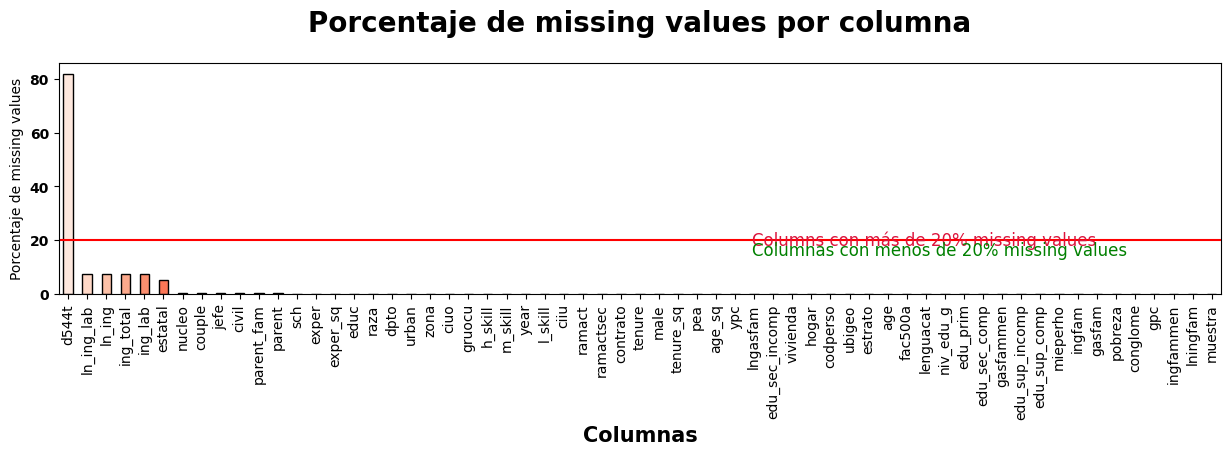

In [ ]:
msv_1(df_piura, 20, color=sns.color_palette('Reds',15))

### **Modificando los missings** ###

In [ ]:
# Elimino los missings de las variables "ing_lab", "civil", "sch" y "estatal"
df_piura_final = df_piura.dropna(subset=['ing_lab', 'civil','sch', 'estatal'])

In [18]:
# Reemplazar NaN en la columna de ingresos extraordinarios'd554t' por 0 
df_piura_final['d544t'].fillna(0, inplace=True)

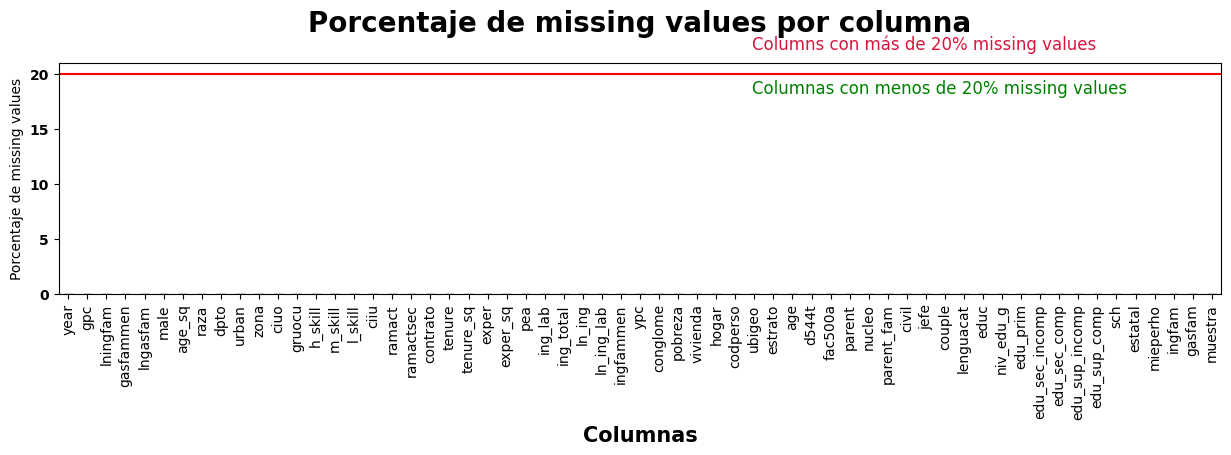

In [ ]:
# Visualizacion del gráfico de vizualizaciones tras los primeros ajustes
msv_1(df_piura_final, 20, color=sns.color_palette('Greens',15))

### **Corrigiendo las variables object "contrato" y "raza"** ###

* Variable *contrato*

In [20]:
df_piura_final.contrato.value_counts()

contrato
nan             1408
Con Contrato     732
Sin Contrato     705
Name: count, dtype: int64

In [21]:
# Reemplazar 'nan' (cadena) por np.nan (NaN) en la columna 'contrato'
df_piura_final['contrato'] = df_piura_final['contrato'].replace('nan', np.nan)

# Convertir la columna 'contrato' a tipo categórico
df_piura_final['contrato'] = df_piura_final['contrato'].astype('category')

# Mostrar los valores únicos después de la corrección
print(df_piura_final['contrato'].unique())

#Verificar los missings
print(' ')
print('Numero de missings:')
print(df_piura_final['contrato'].isnull().sum())

['Con Contrato', NaN, 'Sin Contrato']
Categories (2, object): ['Con Contrato', 'Sin Contrato']
 
Numero de missings:
1408


Obs:
* Como parte del análisis de los datos se ha decidido tratar a los missings en la variable *Contrato*  como "Sin contrato".

In [22]:
# Reemplazar los valores NaN con 'Sin Contrato'
df_piura_final['contrato'] = df_piura_final['contrato'].fillna('Sin Contrato')

# Mostrar los valores después de la corrección
df_piura_final.contrato.value_counts()

contrato
Sin Contrato    2113
Con Contrato     732
Name: count, dtype: int64

* Variable *raza*

In [23]:
df_piura_final.raza.value_counts()

raza
Mestizo                                            1567
Negro/Mulato/Zambo/Afroperuano                      720
Blanco                                              311
Otro                                                145
nan                                                  84
Quechua/Aymara/Nativo o Indígena de la Amazonía      17
9.0                                                   1
Name: count, dtype: int64

In [24]:
# Reemplazar 'nan' (cadena) por np.nan (NaN) en la columna 'raza'
df_piura_final['raza'] = df_piura_final['raza'].replace('nan', np.nan)

# Convertir la columna 'raza' a tipo categórico
df_piura_final['raza'] = df_piura_final['raza'].astype('category')

# Reemplazar '9.0' por np.nan (NaN) en la columna 'raza'
df_piura_final['raza'] = df_piura_final['raza'].replace('9.0', np.nan)

# Reemplazar los valores NaN con 'Otro'
df_piura_final['raza'] = df_piura_final['raza'].fillna('Otro')

# Mostrar los valores después de la corrección
print(df_piura_final['raza'].value_counts())

#Verificar los missings
print(' ')
print('Numero de missings:')
print(df_piura_final['raza'].isnull().sum())

raza
Mestizo                                            1567
Negro/Mulato/Zambo/Afroperuano                      720
Blanco                                              311
Otro                                                230
Quechua/Aymara/Nativo o Indígena de la Amazonía      17
Name: count, dtype: int64
 
Numero de missings:
0


### **Visualización de los missings después de los cambios** ###

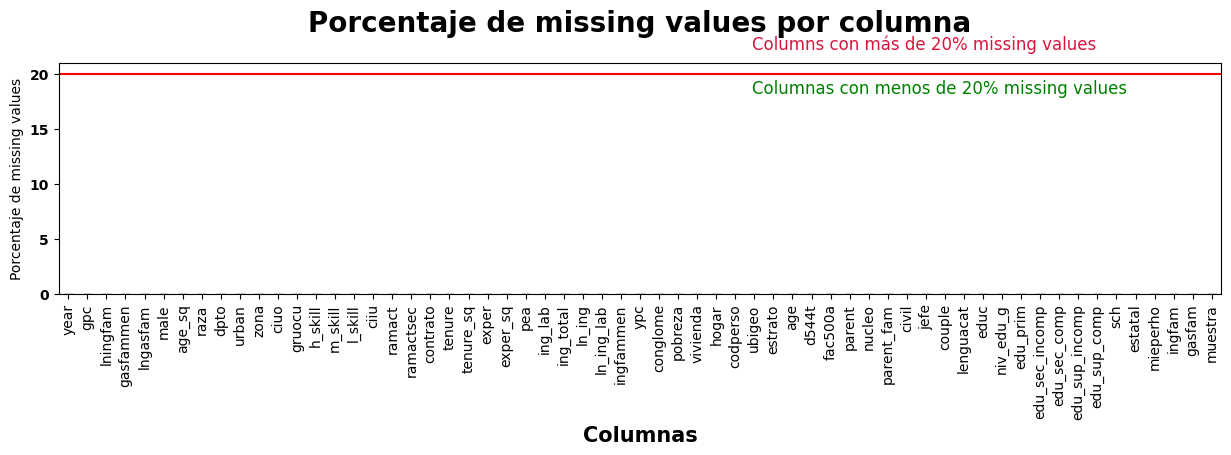

In [25]:
#Visualizacion del grafico del reporte tras los primeros ajustes
msv_1(df_piura_final, 20, color=sns.color_palette('Greens',15))

In [26]:
# Contar los valores nulos en cada columna del DataFrame final
null_counts = df_piura_final.isnull().sum()
print(null_counts.to_string(max_rows=61))

year              0
conglome          0
vivienda          0
hogar             0
codperso          0
ubigeo            0
estrato           0
age               0
d544t             0
fac500a           0
parent            0
nucleo            0
parent_fam        0
civil             0
jefe              0
couple            0
lenguacat         0
educ              0
niv_edu_g         0
edu_prim          0
edu_sec_incomp    0
edu_sec_comp      0
edu_sup_incomp    0
edu_sup_comp      0
sch               0
estatal           0
mieperho          0
ingfam            0
gasfam            0
pobreza           0
ypc               0
gpc               0
ingfammen         0
lningfam          0
gasfammen         0
lngasfam          0
male              0
age_sq            0
raza              0
dpto              0
urban             0
zona              0
ciuo              0
gruocu            0
h_skill           0
m_skill           0
l_skill           0
ciiu              0
ramact            0
ramactsec         0


### **Distribución de las variables** ###

* Variables continuas

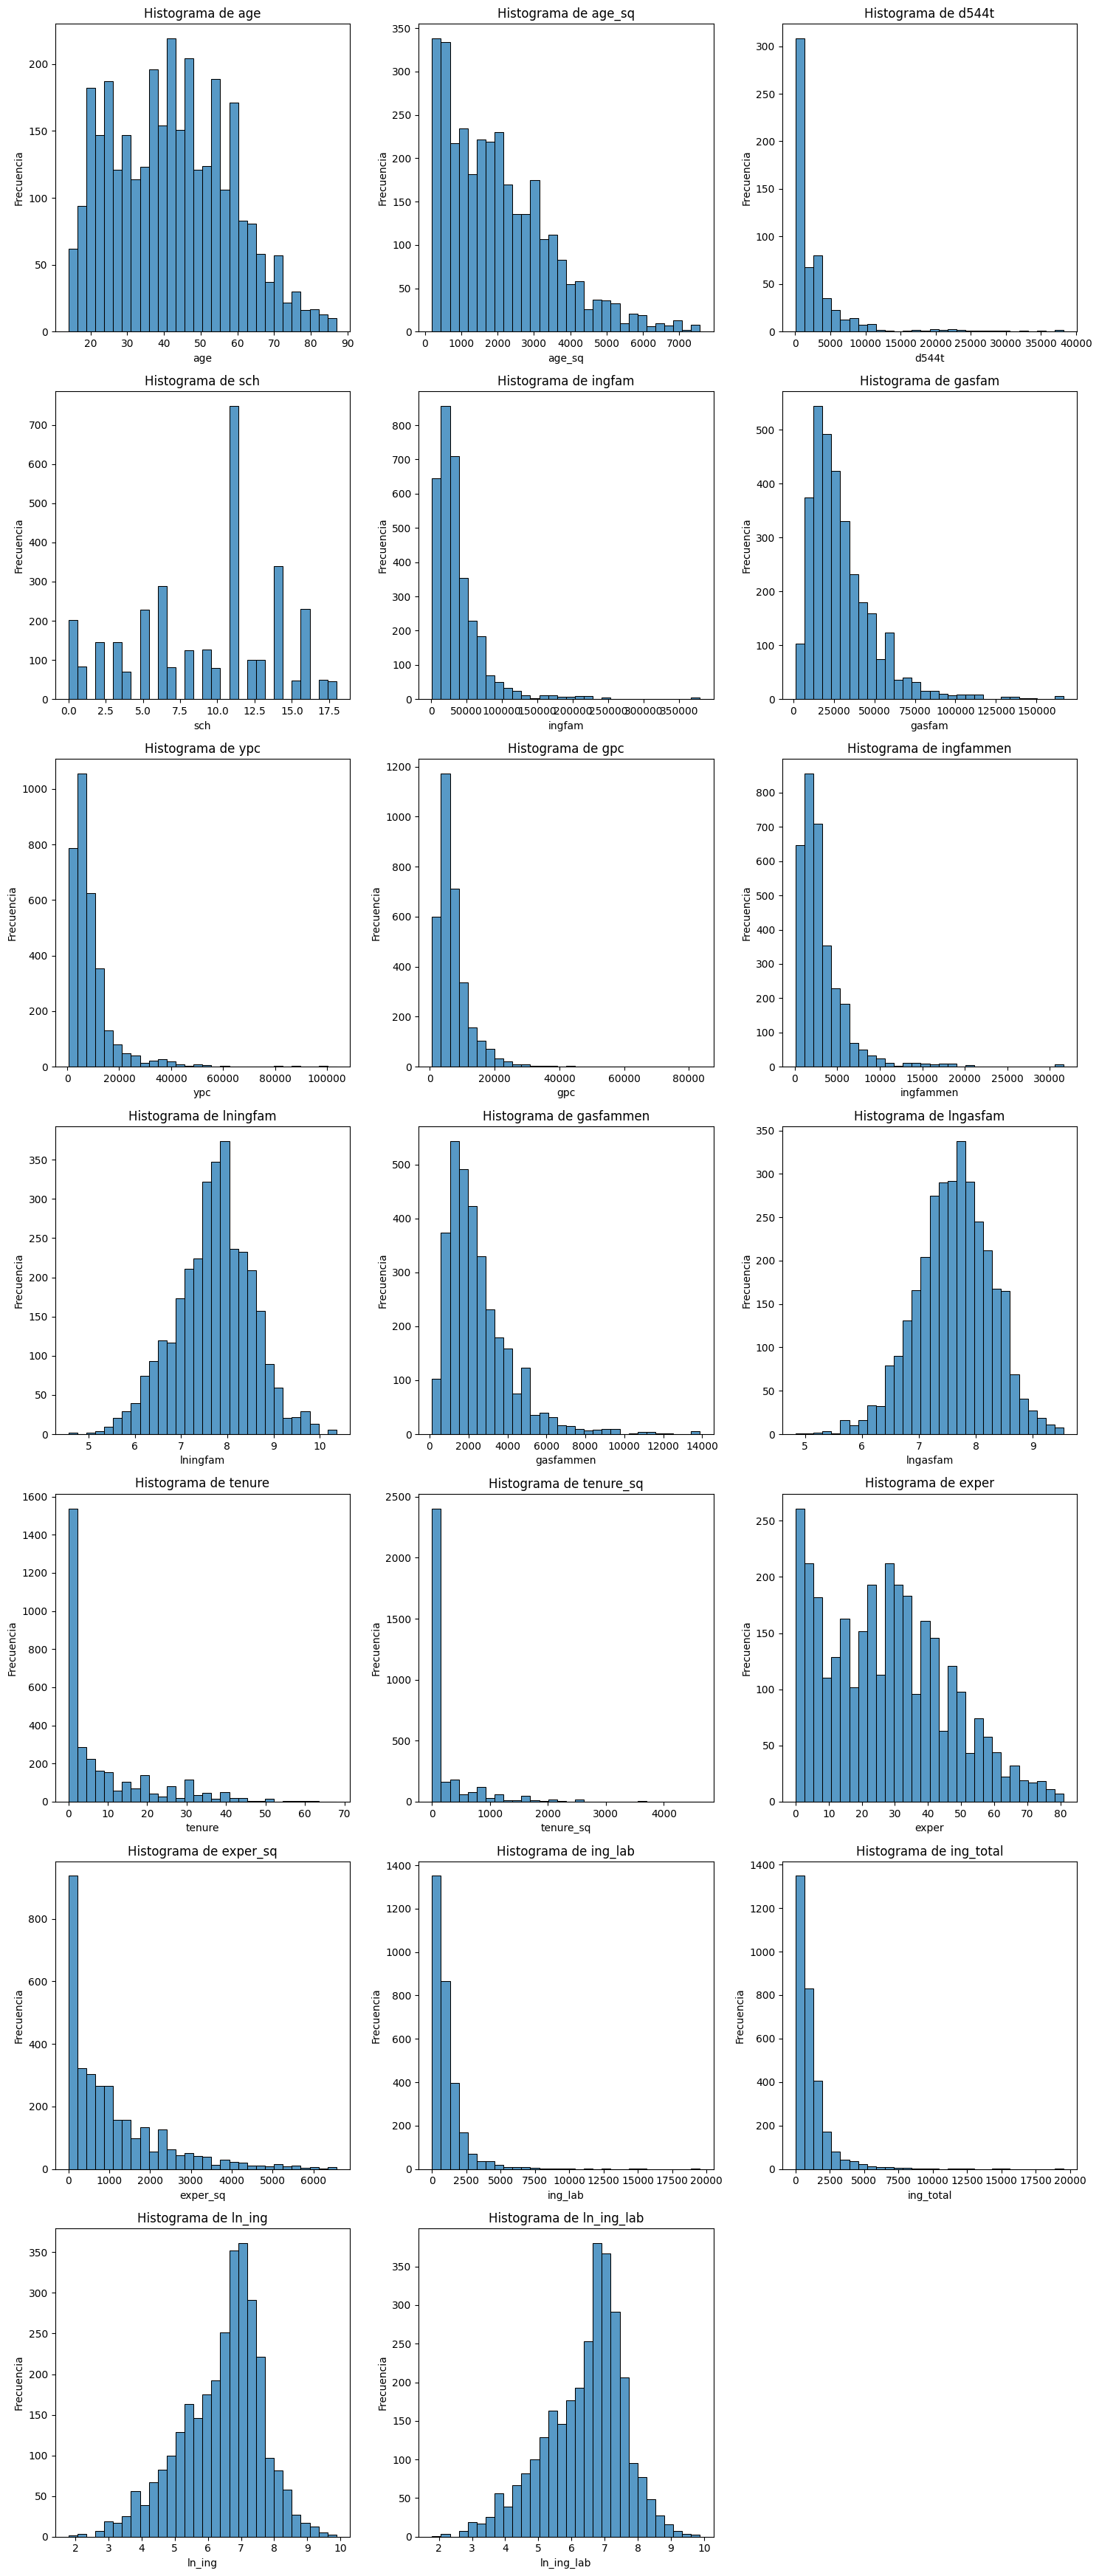

In [28]:
#Color del grafico 
sns.color_palette('bright')

# Variables continuas para los histogramas
variables_continuas = ['age', 'age_sq', 'd544t', 'sch', 'ingfam', 'gasfam', 'ypc', 'gpc', 'ingfammen',
                       'lningfam', 'gasfammen', 'lngasfam', 'tenure', 'tenure_sq', 'exper', 'exper_sq', 'ing_lab',
                       'ing_total', 'ln_ing', 'ln_ing_lab']

# Calcular filas y columnas según la cantidad de variables
num_variables = len(variables_continuas)
num_cols = 3
num_rows = math.ceil(num_variables / num_cols)

# Configurar el tamaño de la figura
plt.figure(figsize=(num_cols * 5, num_rows * 5))

# Iterar sobre las variables continuas y generar los histogramas
for i, var in enumerate(variables_continuas, start=1):
    plt.subplot(num_rows, num_cols, i)  # Ajustar el número de filas y columnas según sea necesario
    sns.histplot(df_piura[var], bins=30, kde=False)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

# Ajustar el diseño y mostrar los histogramas
plt.tight_layout()
plt.show()


* Variables discretas

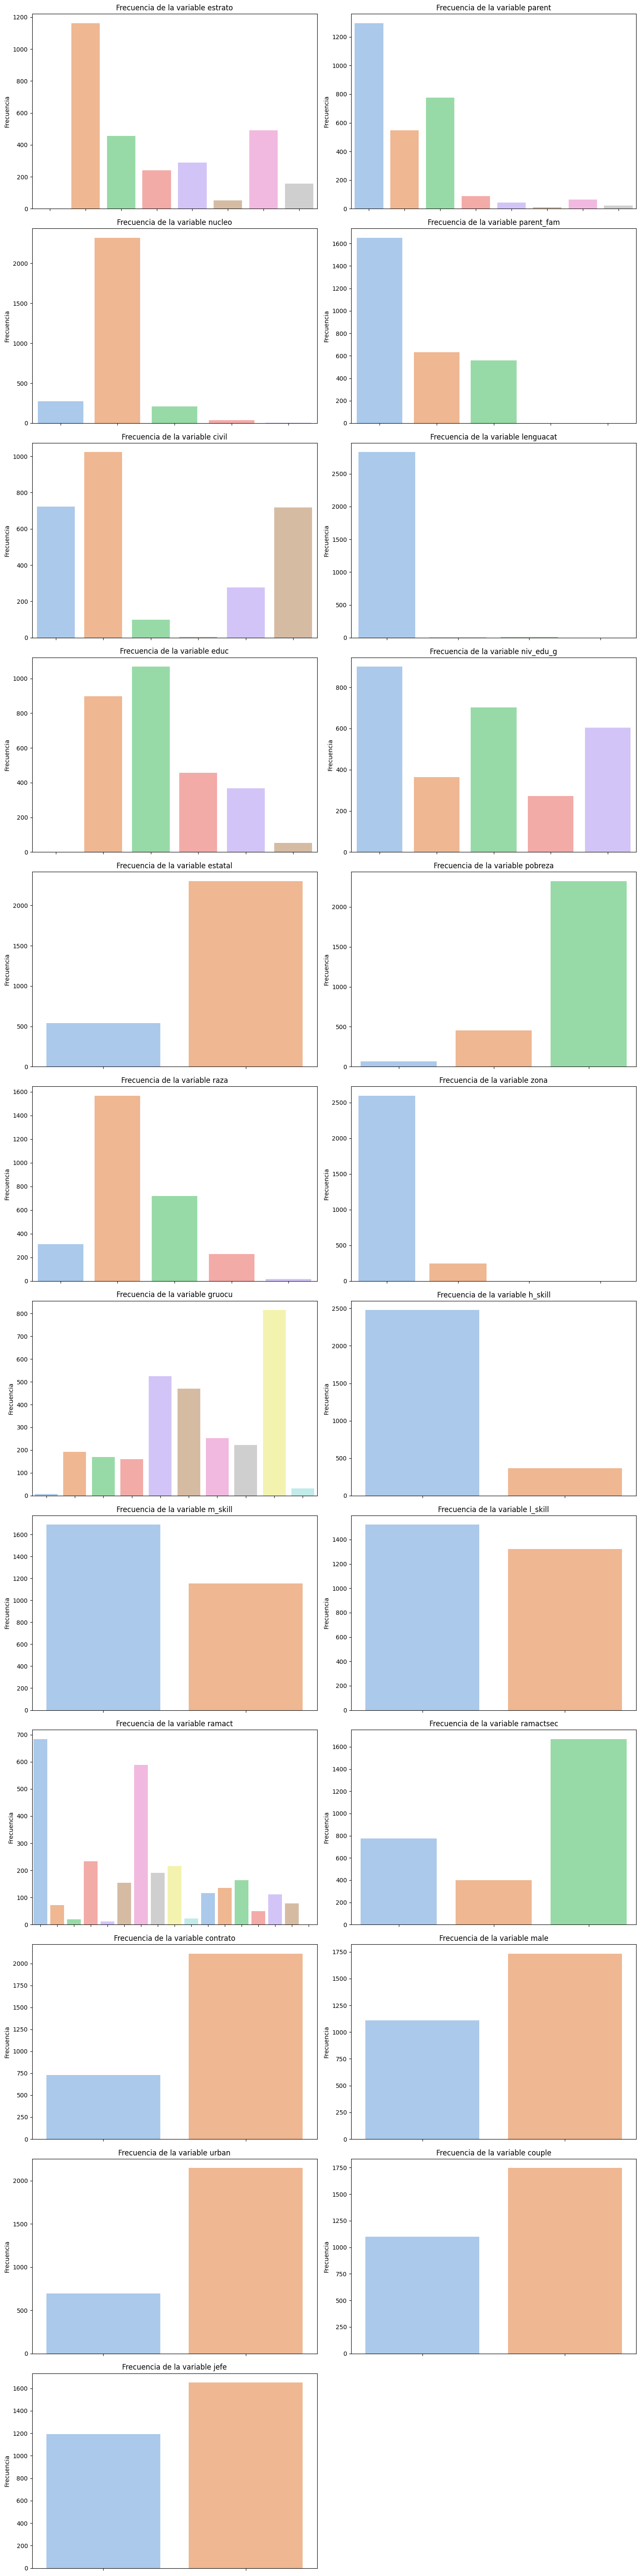

In [30]:
# Variables discretas reducidas para los gráficos de barras
variables_discretas = ['estrato', 'parent', 'nucleo', 'parent_fam', 'civil', 'lenguacat', 'educ', 'niv_edu_g', 'estatal', 'pobreza', 'raza',
                       'zona', 'gruocu', 'h_skill', 'm_skill', 'l_skill', 'ramact', 'ramactsec',
                       'contrato', 'male', 'urban', 'couple', 'jefe']

# Calcular filas y columnas según la cantidad de variables
num_variables = len(variables_discretas)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajustar espacio entre subplots

# Iterar sobre las variables discretas y generar los gráficos de barras
for i, var in enumerate(variables_discretas):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=var, data=df_piura_final, palette='pastel', ax=axes[row, col])
    axes[row, col].set_title(f'Frecuencia de la variable {var}')
    axes[row, col].set_xlabel('')  # Eliminar etiqueta del eje x
    axes[row, col].set_ylabel('Frecuencia')
    axes[row, col].xaxis.set_ticklabels([])  # Ocultar etiquetas del eje x

# Ocultar los subplots vacíos 
if num_variables < num_rows * num_cols:
    for i in range(num_variables, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


In [ ]:
#observando a detalle la variable "zona"
df_piura_final.zona.value_counts()

zona
Costa                 2597
Sierra                 248
Selva                    0
Lima Metropolitana       0
Name: count, dtype: int64

In [32]:
#observando a detalle la variable "zona"
df_piura_final.educ.value_counts()

educ
Secundaria                   1068
Primaria                      898
Superior no universitaria     456
Superior universitaria        367
Postgrado                      54
Sin nivel                       2
Name: count, dtype: int64

### **Presencia de outliers** ###

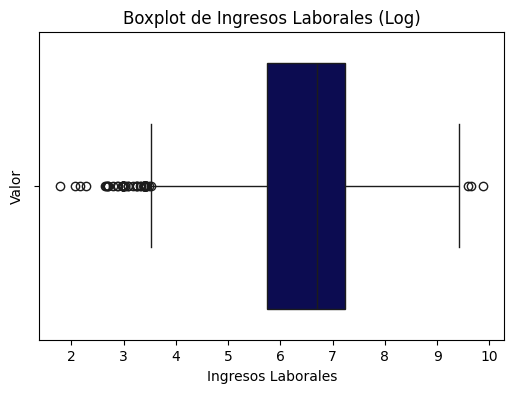

In [ ]:
# box plot
plt.figure(figsize=(6, 4))

sns.boxplot(x='ln_ing_lab', data=df_piura_final, color='#00005c')
plt.title('Boxplot de Ingresos Laborales (Log)')
plt.xlabel('Ingresos Laborales')
plt.ylabel('Valor')

# Mostrar el gráfico
plt.show()


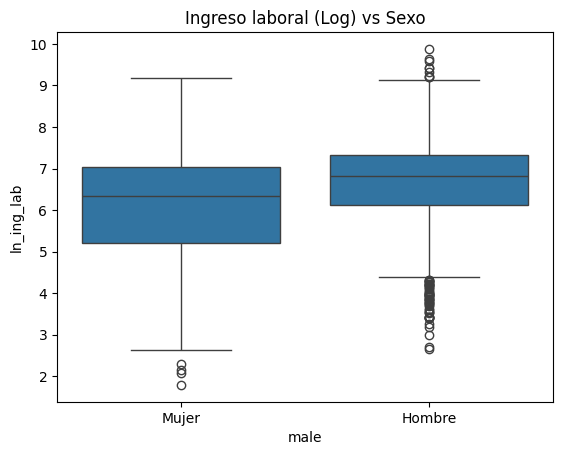

In [35]:
sns.boxplot(x = 'male', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Sexo')
plt.show()


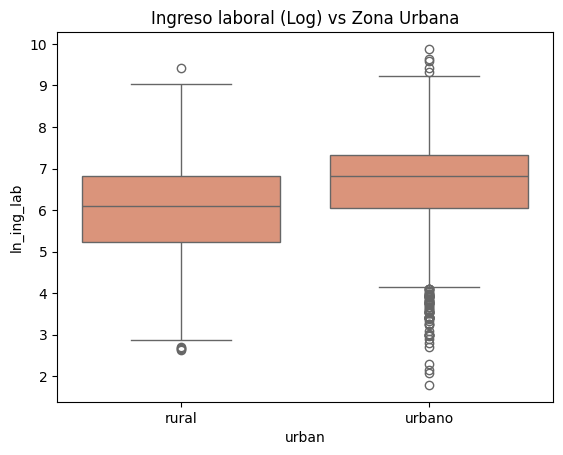

In [36]:
sns.set_palette('flare')
sns.boxplot(x = 'urban', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Zona Urbana')
plt.show()

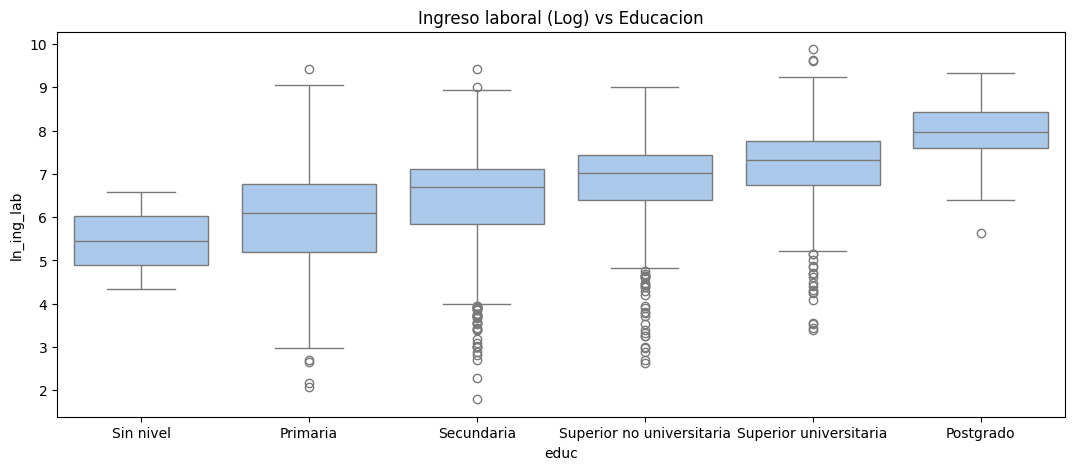

In [37]:
sns.set_palette('pastel')
plt.figure(figsize=(13, 5)) 
sns.boxplot(x = 'educ', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Educacion')
plt.show()

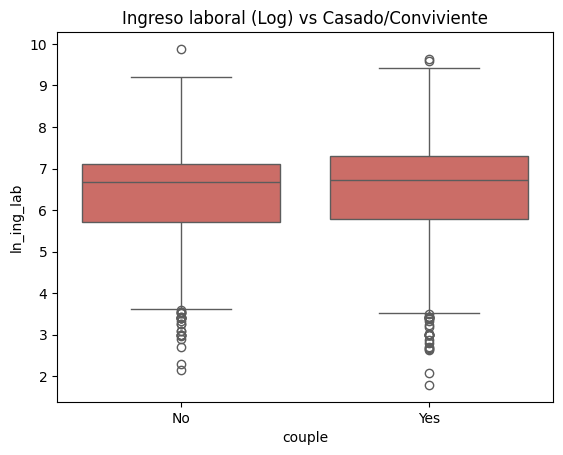

In [38]:
sns.set_palette('hls')
sns.boxplot(x = 'couple', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Casado/Conviviente')
plt.show()

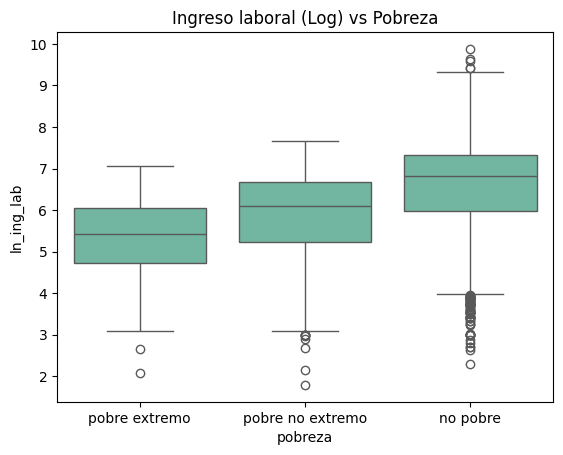

In [39]:
sns.set_palette('Set2')
sns.boxplot(x = 'pobreza', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Pobreza')
plt.show()

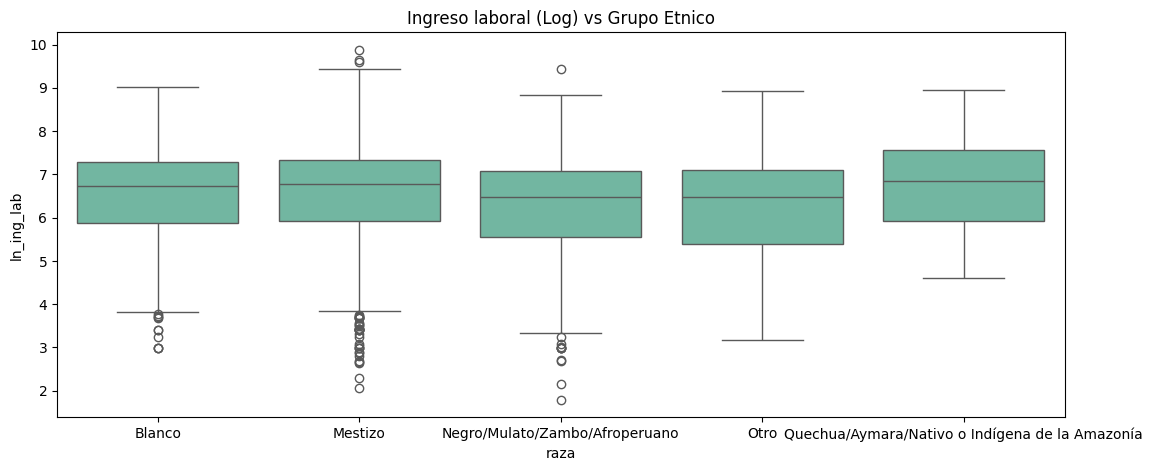

In [40]:
sns.set_palette('Set2')
plt.figure(figsize=(13, 5))
sns.boxplot(x = 'raza', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Grupo Etnico')
plt.show()

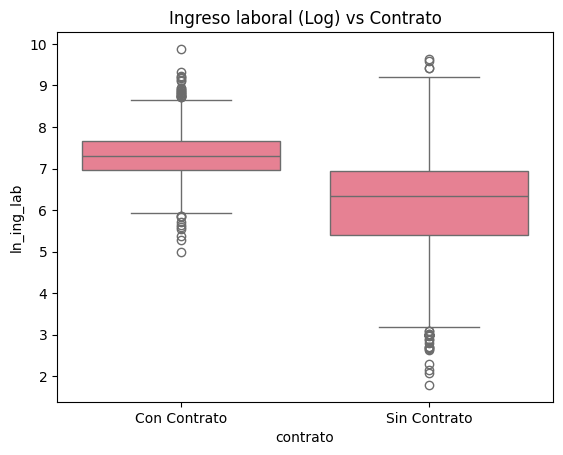

In [41]:
sns.set_palette("husl", 9)
sns.boxplot(x = 'contrato', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Contrato')
plt.show()

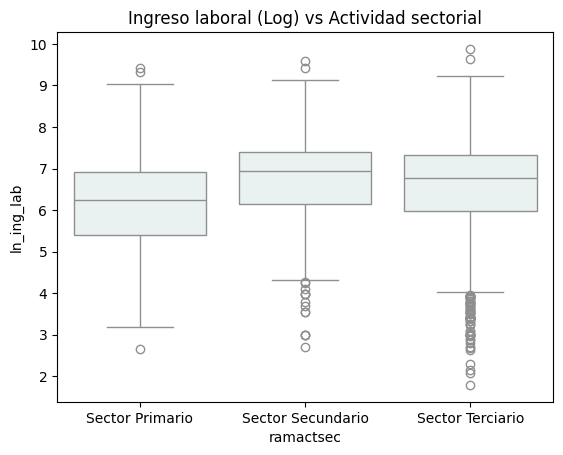

In [42]:
sns.set_palette('light:#27EAE7')
sns.boxplot(x = 'ramactsec', y = 'ln_ing_lab', data = df_piura_final)
plt.title('Ingreso laboral (Log) vs Actividad sectorial')
plt.show()

### **Relacion entre las variables** ###

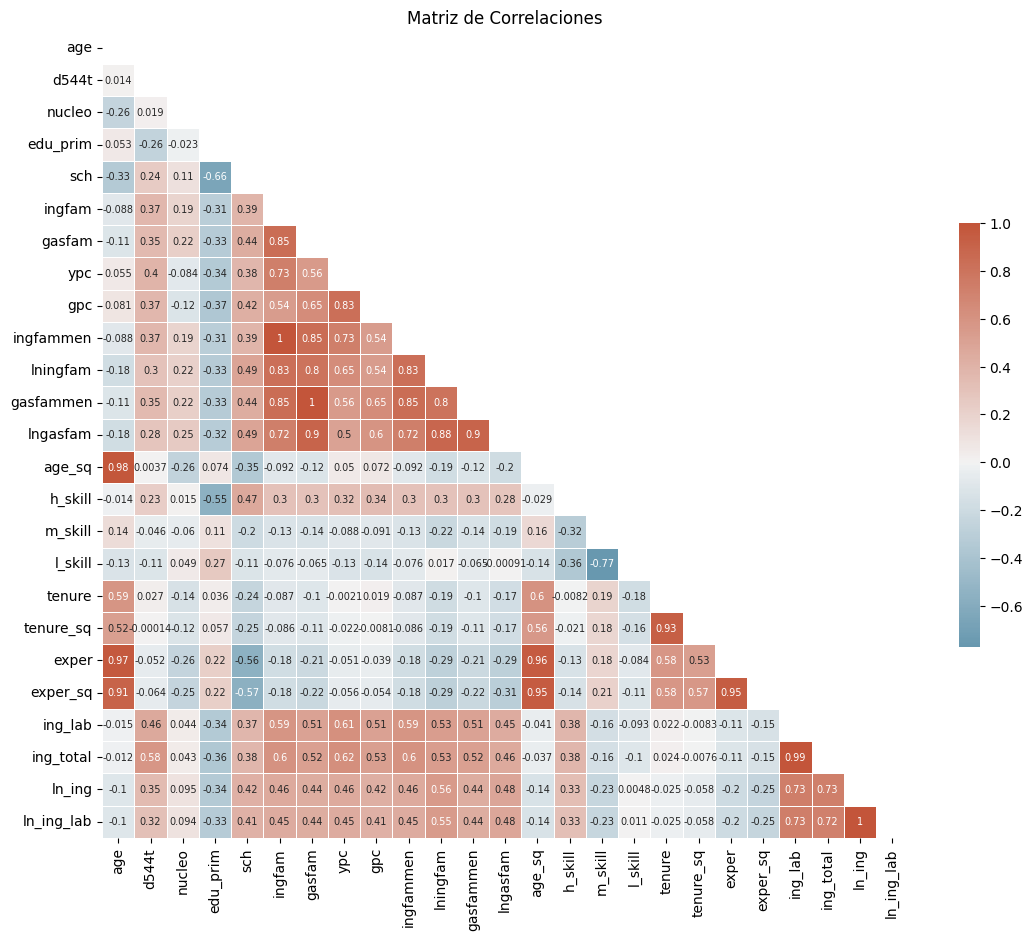

In [45]:
# columnas seleccionadas
piura_without_missing = df_piura_final[['estrato', 'age', 'd544t', 'parent', 'nucleo', 'parent_fam','civil', 'jefe',
                                        'couple', 'lenguacat', 'educ', 'niv_edu_g','edu_prim','sch', 
                                        'estatal', 'ingfam', 'gasfam', 'pobreza', 'ypc','gpc', 'ingfammen', 
                                        'lningfam', 'gasfammen','lngasfam', 'male','age_sq', 'raza', 'dpto', 'urban', 
                                        'zona', 'gruocu', 'h_skill','m_skill', 'l_skill', 'ramact', 'ramactsec','contrato',
                                        'tenure', 'tenure_sq','exper', 'exper_sq', 'pea', 'ing_lab','ing_total', 
                                        'ln_ing', 'ln_ing_lab']]

# dummies
df_encoded = pd.get_dummies(piura_without_missing, columns=['estrato', 'parent', 'parent_fam', 'civil', 'jefe','couple',
                                                            'lenguacat', 'educ', 'niv_edu_g','estatal', 'pobreza', 
                                                            'male', 'raza', 'dpto','urban', 'zona', 'gruocu', 'ramact',
                                                              'ramactsec','contrato', 'pea'])

# solo columnas numéricas para la matriz de correlaciones
df_numeric = df_encoded.select_dtypes(include=[np.number])

# MATRIZ DE CORRELACIONES #
corr = df_numeric.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # máscara triangular para ocultar la parte superior derecha del mapa de calor

plt.figure(figsize=(13, 11)) #visualización del mapa de calor
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, annot_kws={"size": 7})

plt.title('Matriz de Correlaciones')
plt.show()

In [56]:
df_piura_final.columns

Index(['year', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo',
       'estrato', 'age', 'd544t', 'fac500a', 'parent', 'nucleo', 'parent_fam',
       'civil', 'jefe', 'couple', 'lenguacat', 'educ', 'niv_edu_g', 'edu_prim',
       'edu_sec_incomp', 'edu_sec_comp', 'edu_sup_incomp', 'edu_sup_comp',
       'sch', 'estatal', 'mieperho', 'ingfam', 'gasfam', 'pobreza', 'ypc',
       'gpc', 'ingfammen', 'lningfam', 'gasfammen', 'lngasfam', 'male',
       'age_sq', 'raza', 'dpto', 'urban', 'zona', 'ciuo', 'gruocu', 'h_skill',
       'm_skill', 'l_skill', 'ciiu', 'ramact', 'ramactsec', 'contrato',
       'tenure', 'tenure_sq', 'exper', 'exper_sq', 'pea', 'ing_lab',
       'ing_total', 'ln_ing', 'ln_ing_lab', 'muestra'],
      dtype='object')

### **Tratamiento de los outliers** ###

In [58]:
# Calcular IQR (rango intercuartílico)
IQR = 7.21 - 5.66

# Calcular los límites de los bigotes
whisker_low = 5.66 - 1.5 * IQR
whisker_high = 7.21 + 1.5 * IQR

print(f'Límite inferior del bigote: {whisker_low}')
print(f'Límite superior del bigote: {whisker_high}')

Límite inferior del bigote: 3.3350000000000004
Límite superior del bigote: 9.535


In [59]:
piura_without_missing.loc[piura_without_missing['ln_ing_lab'] < 3.33, 'ln_ing_lab'] = 3.33

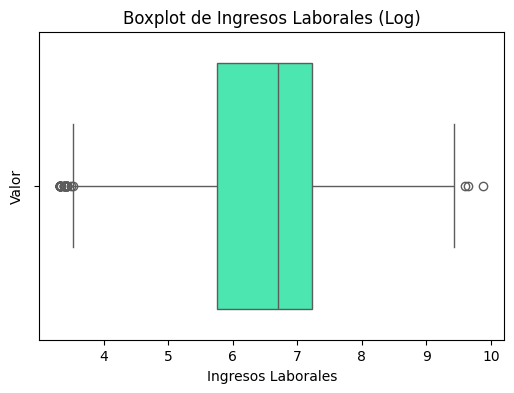

In [ ]:
# boxplot de ln_ing_lab
plt.figure(figsize=(6, 4))

sns.boxplot(x='ln_ing_lab', data=piura_without_missing, color='#33FFB8')

plt.title('Boxplot de Ingresos Laborales (Log)')
plt.xlabel('Ingresos Laborales')
plt.ylabel('Valor')

plt.show()

In [62]:
#Exportando la base de datos 
bbdd_piura = piura_without_missing [['estrato', 'age', 'd544t', 'parent', 'nucleo', 'parent_fam', 'civil',
       'lenguacat', 'educ', 'niv_edu_g', 'edu_prim', 'sch', 'estatal',
       'ingfam', 'pobreza', 'age_sq', 'raza', 'zona',
       'gruocu', 'ramact', 'ramactsec', 'contrato', 'tenure', 'tenure_sq',
       'exper', 'exper_sq', 'pea', 'ing_lab', 'ing_total', 'ln_ing',
       'ln_ing_lab', 'sexo_hombre', 'urbano', 'casado', 'jefe', 'h_skill_1.0',
       'm_skill_1.0', 'l_skill_1.0']]

bbdd_piura.to_parquet("../data/interm/bbdd_piura.parquet")